<a href="https://colab.research.google.com/github/man0045/Data-Science/blob/master/CNN_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [15]:
!pip install opencv-python  # Install OpenCV using pip

import cv2
import numpy as np

# Download the image
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg

# Read the image using OpenCV
image = cv2.imread("./input.jpg")

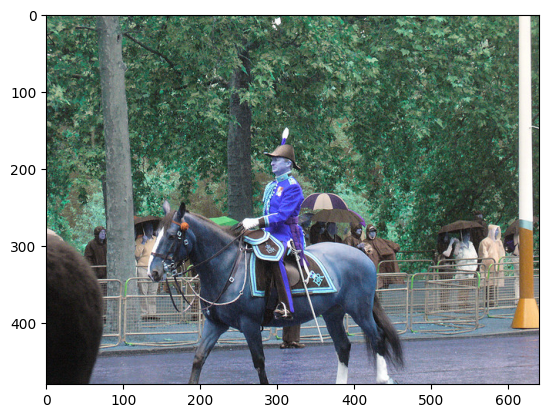

In [16]:
plt.imshow(image)

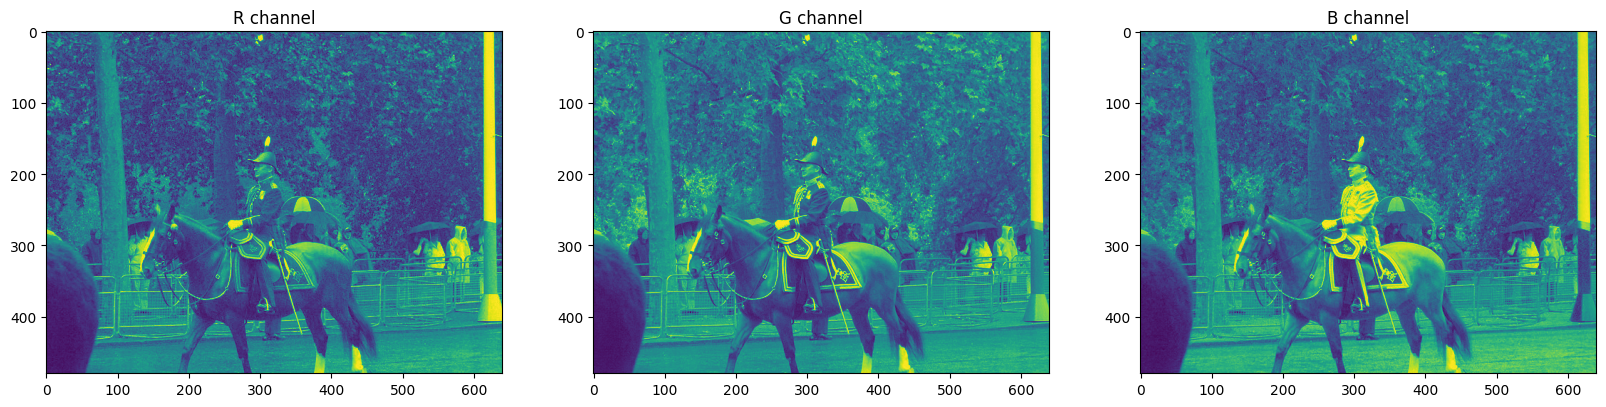

In [17]:
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.set_title('R channel')
ax1.imshow(r)
ax2.set_title('G channel')
ax2.imshow(g)
ax3.set_title('B channel')
ax3.imshow(b)

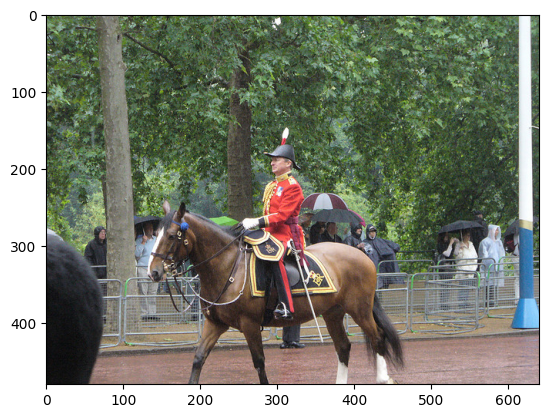

In [18]:
from ast import increment_lineno
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np
%matplotlib inline
image = mpimg.imread('input.jpg')
plt.imshow(image)

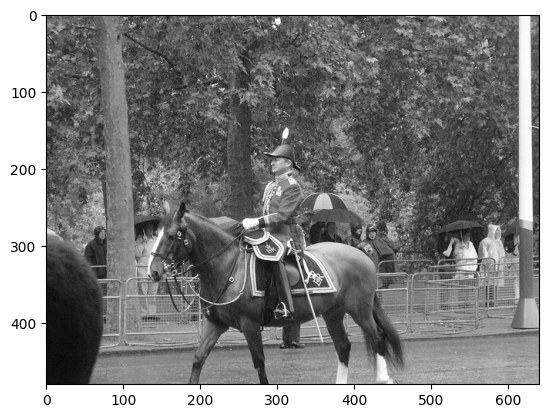

In [19]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

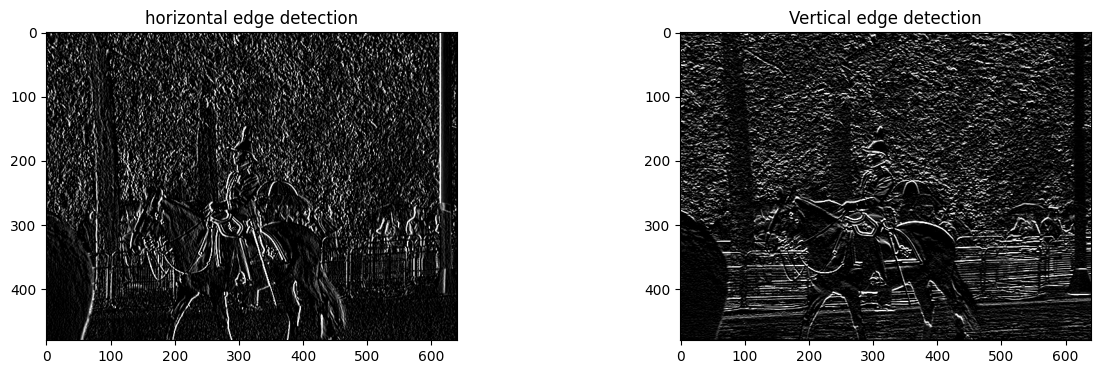

In [20]:
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

filtered_image1 = cv2.filter2D(gray, -1, sobel_x)
filtered_image2 = cv2.filter2D(gray, -1, sobel_y)
f, ax = plt.subplots(1, 2, figsize = (15, 4))

ax[0].set_title('horizontal edge detection')
ax[0].imshow(filtered_image1, cmap='gray')
ax[1].set_title('Vertical edge detection')
ax[1].imshow(filtered_image2, cmap='gray')

In [21]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST dataset has a training set of %d examples." % len(X_train))
print("The MNIST dataset has a training set of %d examples." % len(X_test))



The MNIST dataset has a training set of 60000 examples.
The MNIST dataset has a training set of 10000 examples.


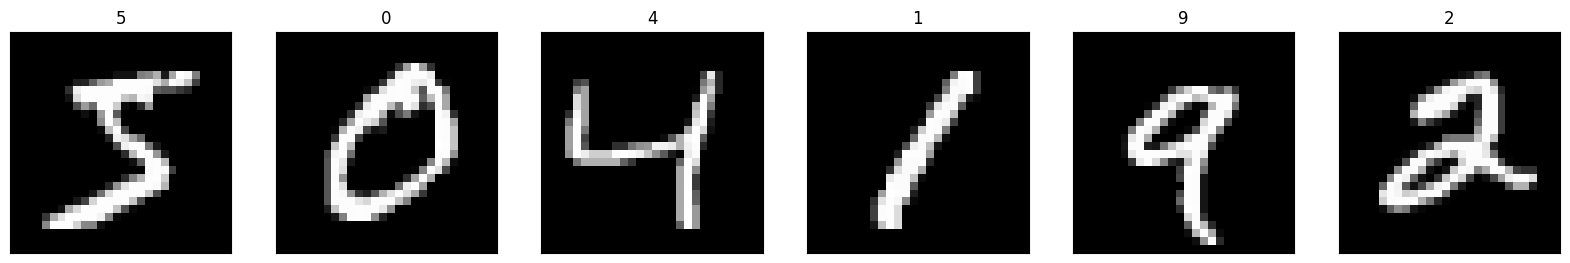

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize = (20,20))
for i in range(6):
  ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
  ax.imshow(X_train[i], cmap='gray')
  ax.set_title(str(y_train[i]))

In [25]:
def visualise_input(img, ax):
  ax.imshow(img, cmap='gray')
  width, height = img.shape
  thresh = img.max()/2.55
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y], 2)), xy=(y,x),
                  horizontalalignment = 'center',
                  verticlealignment='center',
                  color = 'white' if img[x][y] < thresh else 'black')
  fig = plt.figure(figsize = (12,12))
  ax = fig.add_subplot(111)
  visualise_input(X_train[0], ax)

In [27]:
X_train=X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print('X_train shape: ', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape:  (60000, 28, 28)
60000 train samples
10000 test samples


In [30]:
from keras.utils import to_categorical
num_classes = 10

print('Integer_valued labels: ')
print(y_train[: 10])

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('one-Hot labels:')
print(y_train[:10])


Integer_valued labels: 
[5 0 4 1 9 2 1 3 1 4]
one-Hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [32]:
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('input_shape: ', input_shape)
print('x_train shape: ', X_train.shape)

input_shape:  (28, 28, 1)
x_train shape:  (60000, 28, 28, 1)


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)               

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdfs', verbose=1,
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpointer],
                 verbose=2, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.04834, saving model to model.weights.best.hdfs
938/938 - 9s - loss: 0.1680 - accuracy: 0.9478 - val_loss: 0.0483 - val_accuracy: 0.9847 - 9s/epoch - 10ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.04834 to 0.03371, saving model to model.weights.best.hdfs
938/938 - 4s - loss: 0.0496 - accuracy: 0.9847 - val_loss: 0.0337 - val_accuracy: 0.9888 - 4s/epoch - 5ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.03371 to 0.03197, saving model to model.weights.best.hdfs
938/938 - 4s - loss: 0.0331 - accuracy: 0.9901 - val_loss: 0.0320 - val_accuracy: 0.9892 - 4s/epoch - 4ms/step
Epoch 4/10

Epoch 4: val_loss did not improve from 0.03197
938/938 - 3s - loss: 0.0250 - accuracy: 0.9924 - val_loss: 0.0330 - val_accuracy: 0.9902 - 3s/epoch - 4ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 0.03197
938/938 - 4s - loss: 0.0193 - accuracy: 0.9939 - val_loss: 0.0339 - val_accuracy: 0.9893 - 4s/epoch - 4ms/step
Epoch 6/10

Epoch 

In [44]:
model.load_weights('model.weights.best.hdfs')

In [46]:
score = model.evaluate(X_test, y_test, verbose=0)
accuracy=100*score[1]
print('Test accuracy: % .4f%%' % accuracy)

Test accuracy:  99.0900%


In [47]:
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


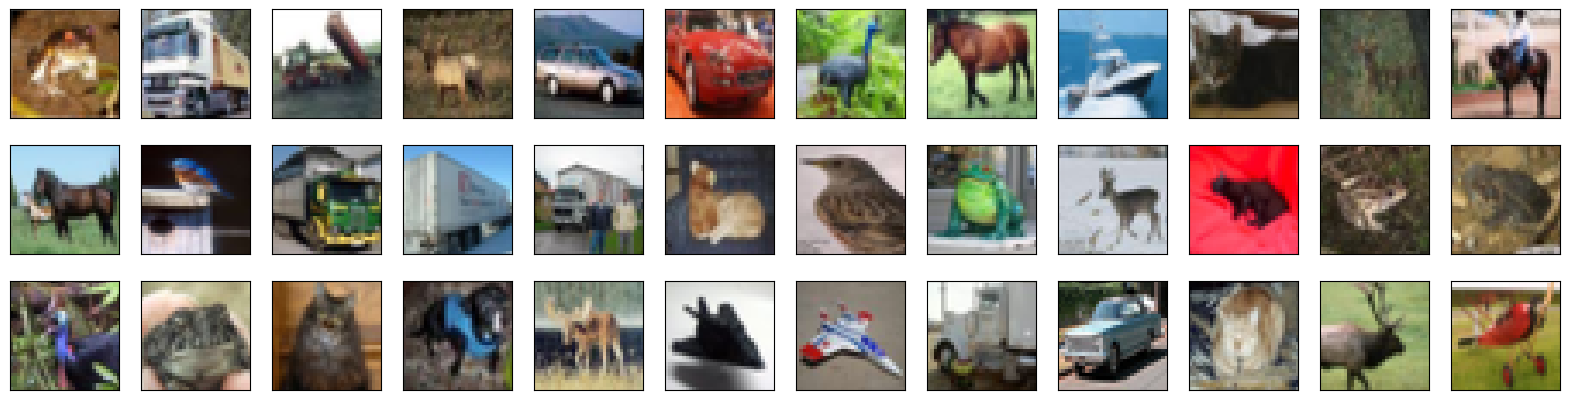

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig =plt.figure(figsize=(20, 5))
for i in range(36):
  ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]))

In [52]:
from tensorflow import keras
import numpy as np

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')



x_train shape (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size = 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size = 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 64)         

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [57]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdfs', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=1, validation_data=(x_valid, y_valid), callbacks=[checkpointer],
                 verbose = 2, shuffle=True)


Epoch 1: val_loss improved from inf to 1.71488, saving model to model.weights.best.hdfs
1407/1407 - 10s - loss: 1.9361 - accuracy: 0.3425 - val_loss: 1.7149 - val_accuracy: 0.3986 - 10s/epoch - 7ms/step


In [58]:
model.load_weights('model.weights.best.hdfs')

In [59]:
y_hat = model.predict(x_test)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 [==============================] - 1s 2ms/step


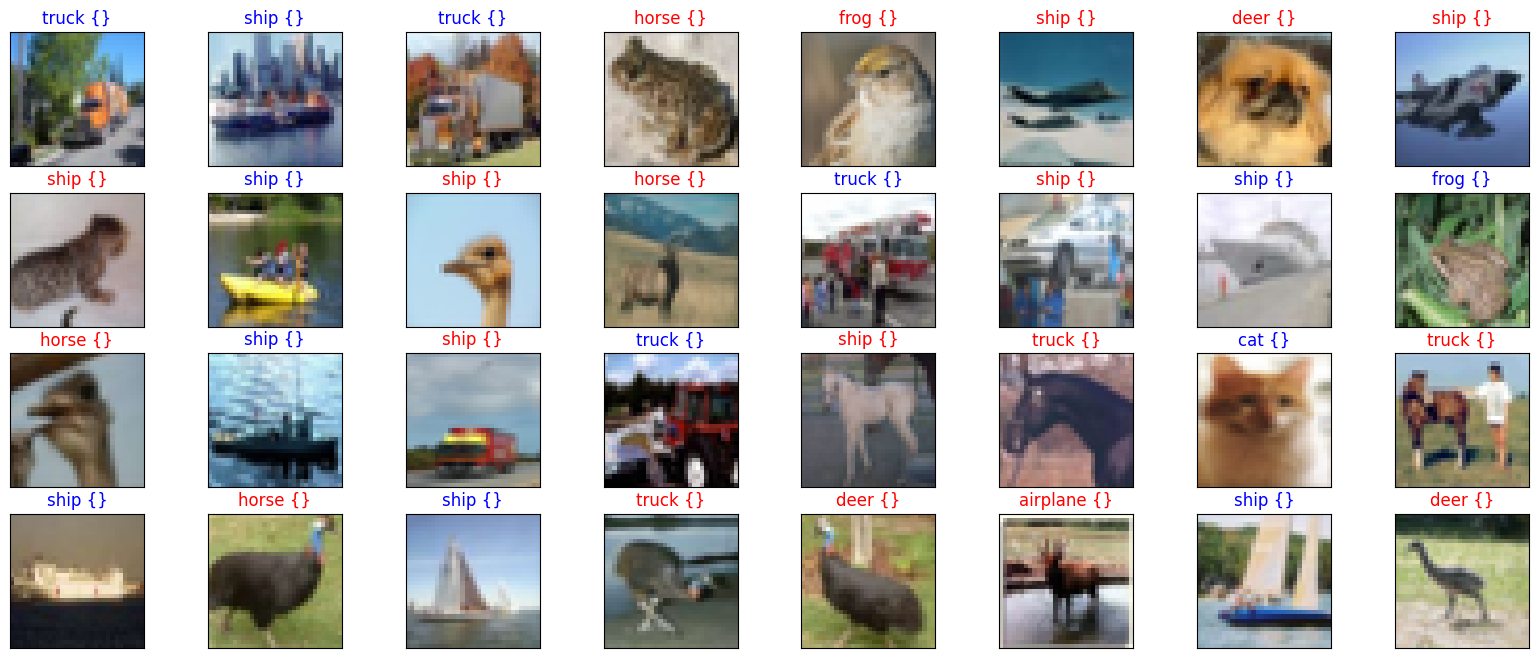

In [61]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
  ax = fig.add_subplot(4, 8, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_test[idx]))
  pred_idx = np.argmax(y_hat[idx])
  true_idx = np.argmax(y_test[idx])
  ax.set_title("{} {{}}".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
               color=("blue" if pred_idx == true_idx else "red"))